Populating the interactive namespace from numpy and matplotlib


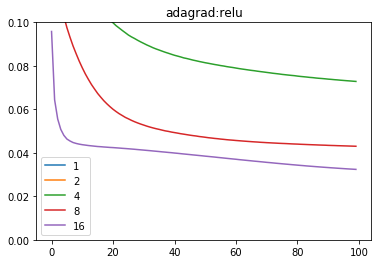

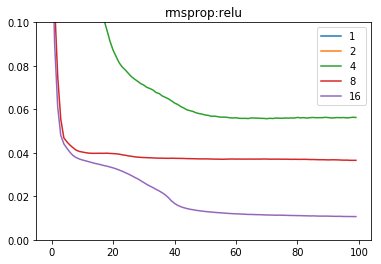

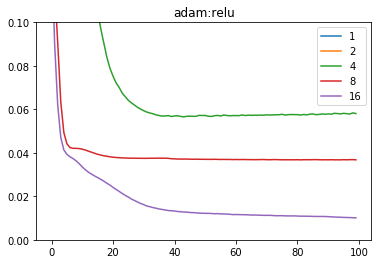

In [3]:
%pylab inline
import csv
import os
from collections import defaultdict

ls = os.listdir("log_mlp")
error = defaultdict(list)
for filename in ls:
    _, optimizer, hidden = filename.strip(".csv").split("_")
    activation = hidden[:-1]
    if activation not in ["relu", "tanh", "sigmoid"]:
        activation = hidden[:-2]
    n_hidden = int(hidden[len(activation):])
    reader = csv.reader(open(os.path.join("log_mlp", filename)))
    next(reader)
    for line in reader:
        _, err, _, _ = line
        error[(optimizer,activation,n_hidden)].append(float(err))
        
optimizers = set([key[0] for key in error.keys()])
activations = set([key[1] for key in error.keys()])
n_hiddens = set([key[2] for key in error.keys()])

for optimizer in optimizers:
    for activation in activations:
        plt.figure()
        for n in n_hiddens:
            plt.plot(error[(optimizer, activation, n)], label=str(n))
        plt.ylim([0,0.1])
        plt.legend()
        plt.title(optimizer+":"+activation)